In [7]:
# Cell 0 — make 'src' importable and point to project-root/data
import sys
from pathlib import Path

project_root = Path.cwd()
# If we're inside notebooks/, move one level up to the project root
if not (project_root / "src").exists():
    project_root = project_root.parent

# Ensure project root is on Python path
sys.path.insert(0, str(project_root))
print("Project root:", project_root)

# Build an absolute dataset path under project root
dataset_path = project_root / "data" / "Iris.csv"
print("Dataset path:", dataset_path)
print("Exists?:", dataset_path.exists())

Project root: c:\Projects\CodeAlpha\Iris-Flower-Classification
Dataset path: c:\Projects\CodeAlpha\Iris-Flower-Classification\data\Iris.csv
Exists?: True


In [8]:
# Cell 1: Imports & Load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from src.data_utils import load_iris_csv, IRIS_FEATURES, TARGET_COL
from src.models import get_model
from src.features import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Use the absolute path computed in Cell 0
X, y, df = load_iris_csv(dataset_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


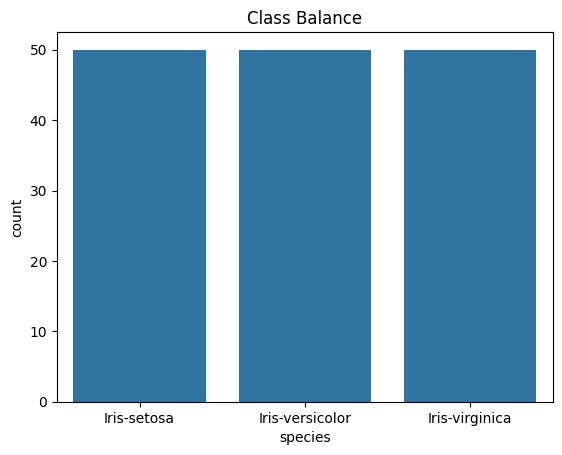

In [10]:
# Cell 2: Basic info and class balance
display(df.info())
display(df.describe())  # removed numeric_only=True

sns.countplot(x=TARGET_COL, data=df)
plt.title("Class Balance")
plt.show()

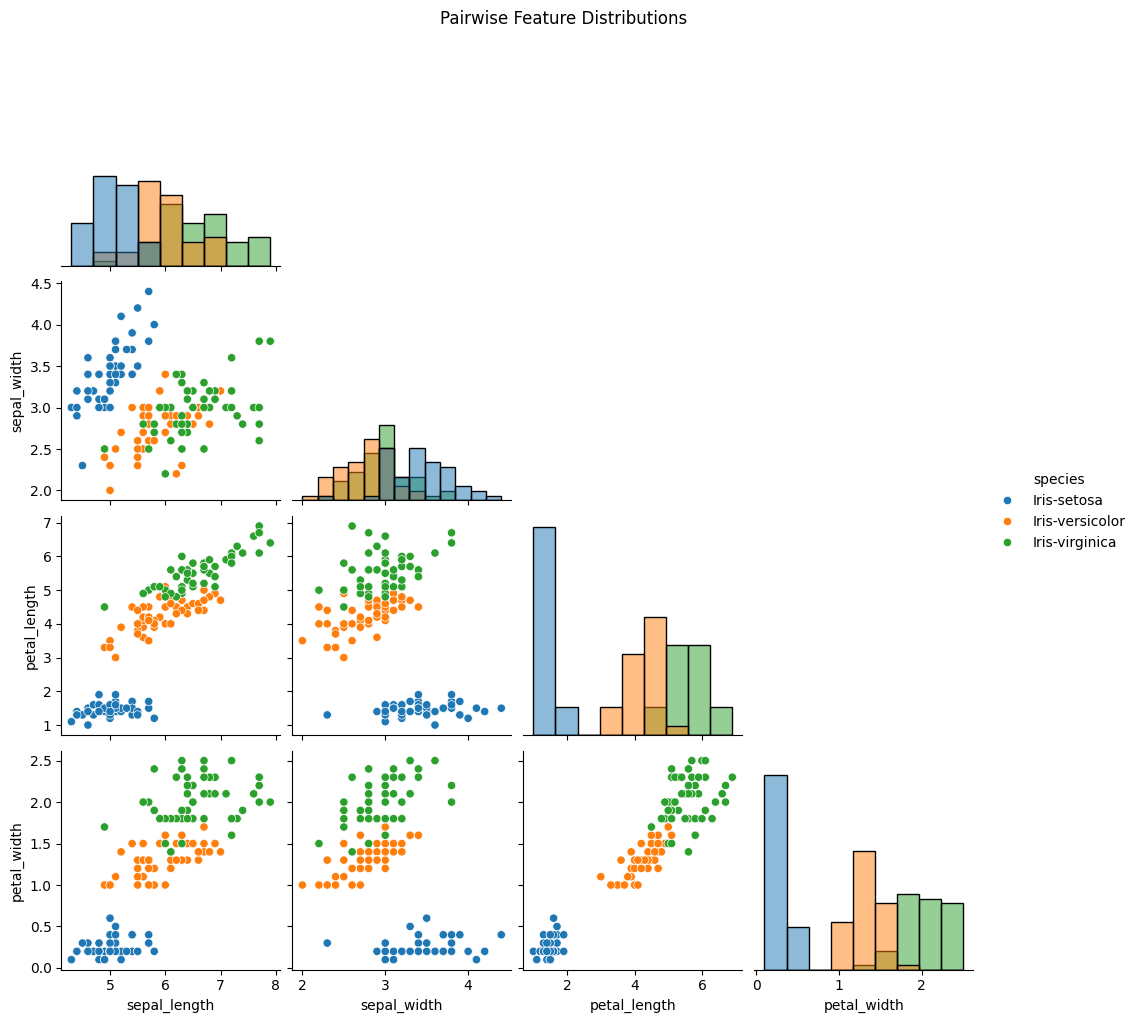

In [13]:
# Cell 3: Pairplot (EDA)
sns.pairplot(df, vars=IRIS_FEATURES, hue=TARGET_COL, corner=True, diag_kind="hist")
plt.suptitle("Pairwise Feature Distributions", y=1.02)
plt.show()

CV Accuracy: 0.967 ± 0.017
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



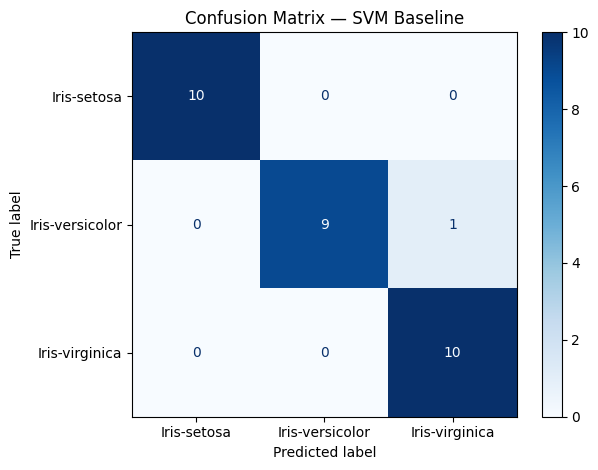

In [16]:
# Cell 4: Baseline model (SVM + scaling)
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = get_model("svm", random_state=42)
pipe = make_pipeline(model, scale=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
print(f"CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix — SVM Baseline")
plt.tight_layout()
plt.show()